### Environment Setting

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

In [0]:
os.chdir('/content/drive/My Drive/108-2 Machine Learning/02 Midterm Assignment/02 Data')

In [3]:
train = pd.read_csv('train.csv')
train.head(3)

,行政區,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,總價
0,南屯區,39.45,282.29,0.739235,12,20,住,4,2,2,1,坡道平面,2019/3/22,120.622384,24.150631,2520
1,西屯區,37.02,202.61,2.387455,7,21,住,3,2,2,1,坡道平面,2019/11/18,120.627938,24.183700,1830
2,西屯區,34.57,209.64,11.729194,9,14,住,4,2,2,1,坡道平面,2018/12/11,120.640036,24.181468,1040


### EDA

In [4]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
''' descriptive statistics ''' 
df = train.describe()
df.round(2)

,土地面積,建物總面積,屋齡,樓層,總樓層,房數,廳數,衛數,電梯,經度,緯度,總價
count,30000.00,30000.00,29999.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,18.73,136.85,16.73,7.46,13.23,2.74,1.68,1.80,0.91,120.67,24.16,841.19
std,13.09,90.88,11.78,4.35,5.79,1.40,0.70,1.19,0.29,0.03,0.03,760.97
min,0.10,0.02,0.00,1.00,1.00,0.00,0.00,0.00,0.00,120.58,23.98,0.00
25%,10.80,86.68,4.04,4.00,9.00,2.00,1.00,1.00,1.00,120.65,24.14,410.00
50%,17.60,127.92,20.47,7.00,13.00,3.00,2.00,2.00,1.00,120.67,24.16,670.00
75%,24.75,169.27,24.92,10.00,15.00,3.00,2.00,2.00,1.00,120.69,24.17,1045.25
max,875.00,6263.64,56.99,30.00,41.00,91.00,33.00,91.00,1.00,120.98,24.24,36000.00


In [6]:
''' calculate correlation between features to detect colinearity '''
corr = train.corr()
corr = corr.round(2)

''' visualize correlation matrix ''' 
#corr.style.background_gradient(cmap='coolwarm')
corr

,土地面積,建物總面積,屋齡,樓層,總樓層,房數,廳數,衛數,電梯,經度,緯度,總價
土地面積,1.00,0.74,-0.17,-0.09,-0.11,0.68,0.37,0.60,-0.21,0.00,-0.00,0.59
建物總面積,0.74,1.00,-0.42,0.19,0.36,0.69,0.41,0.62,0.17,-0.08,0.01,0.88
屋齡,-0.17,-0.42,1.00,-0.31,-0.55,-0.08,-0.23,-0.05,-0.48,0.03,-0.00,-0.52
樓層,-0.09,0.19,-0.31,1.00,0.56,-0.00,0.05,0.00,0.29,-0.06,0.01,0.25
總樓層,-0.11,0.36,-0.55,0.56,1.00,0.03,0.11,0.03,0.46,-0.15,0.02,0.46
房數,0.68,0.69,-0.08,-0.00,0.03,1.00,0.41,0.86,-0.11,0.01,-0.03,0.50
廳數,0.37,0.41,-0.23,0.05,0.11,0.41,1.00,0.22,0.02,0.01,-0.02,0.36
衛數,0.60,0.62,-0.05,0.00,0.03,0.86,0.22,1.00,-0.07,-0.01,-0.01,0.46
電梯,-0.21,0.17,-0.48,0.29,0.46,-0.11,0.02,-0.07,1.00,-0.08,0.00,0.18
經度,0.00,-0.08,0.03,-0.06,-0.15,0.01,0.01,-0.01,-0.08,1.00,-0.10,-0.18


In [0]:
font_path = "/content/drive/My Drive/108-2 Machine Learning/02 Midterm Assignment/05 Chinese Fonts/Copy of 蒙纳繁长宋.ttf"
prop = FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False

([<matplotlib.axis.XTick at 0x7f6e90ebad30>,
 <a list of 10 Text major ticklabel objects>)

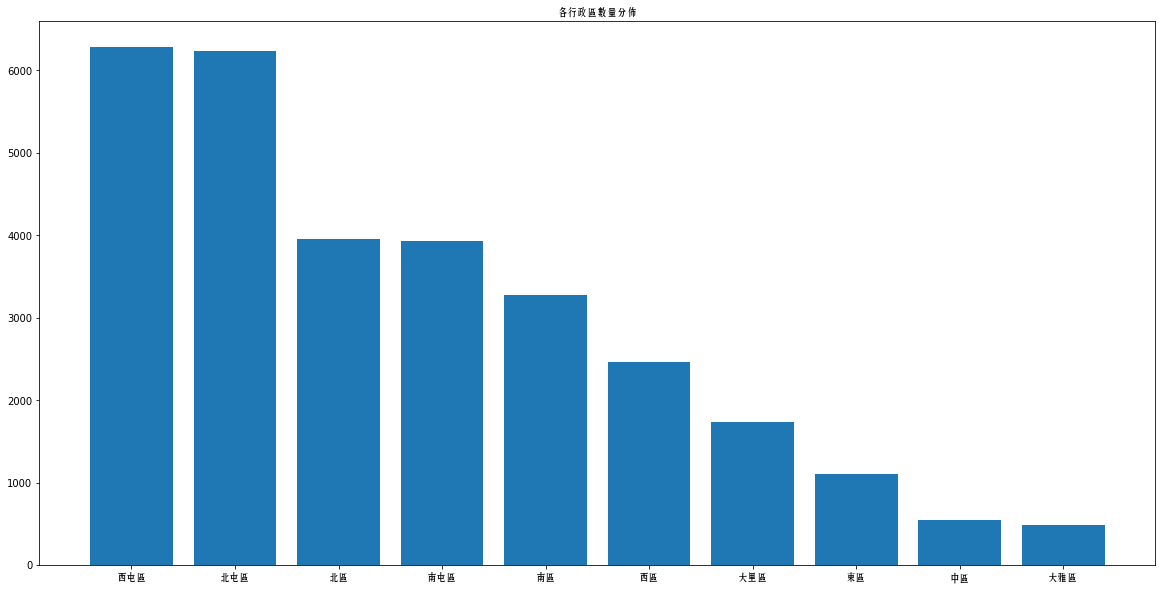

In [17]:
plt.figure(figsize=(20,10))

district = train['行政區'].value_counts()
plt.bar(district.index, district.values)
plt.title('各行政區數量分佈', fontproperties=prop)
plt.xticks(ticks=np.array(district.index), fontproperties=prop)

In [0]:
col = ['土地面積', '建物總面積', '屋齡', '總價']
for c in col:
  plt.figure(figsize=(10,10))
  plt.title(c, fontproperties=prop)
  plt.hist(train[c], bins='rice')
  plt.show()

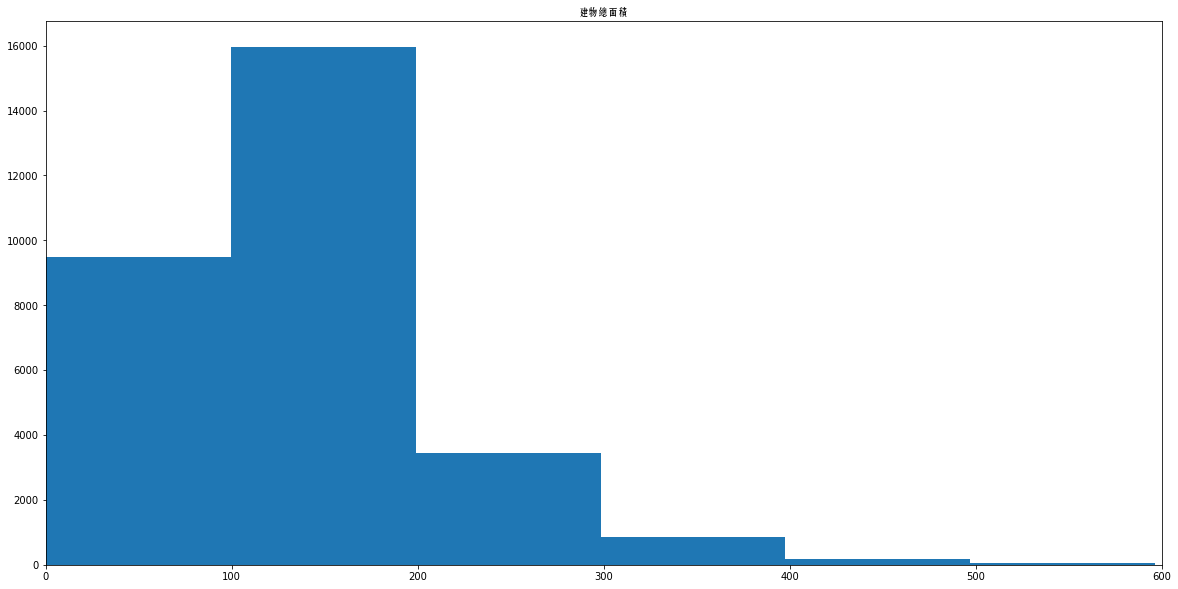

In [18]:
plt.figure(figsize=(20,10))
plt.title('建物總面積', fontproperties=prop)
plt.hist(train['建物總面積'], bins='rice')
plt.xlim(left=0, right=600)
plt.show()

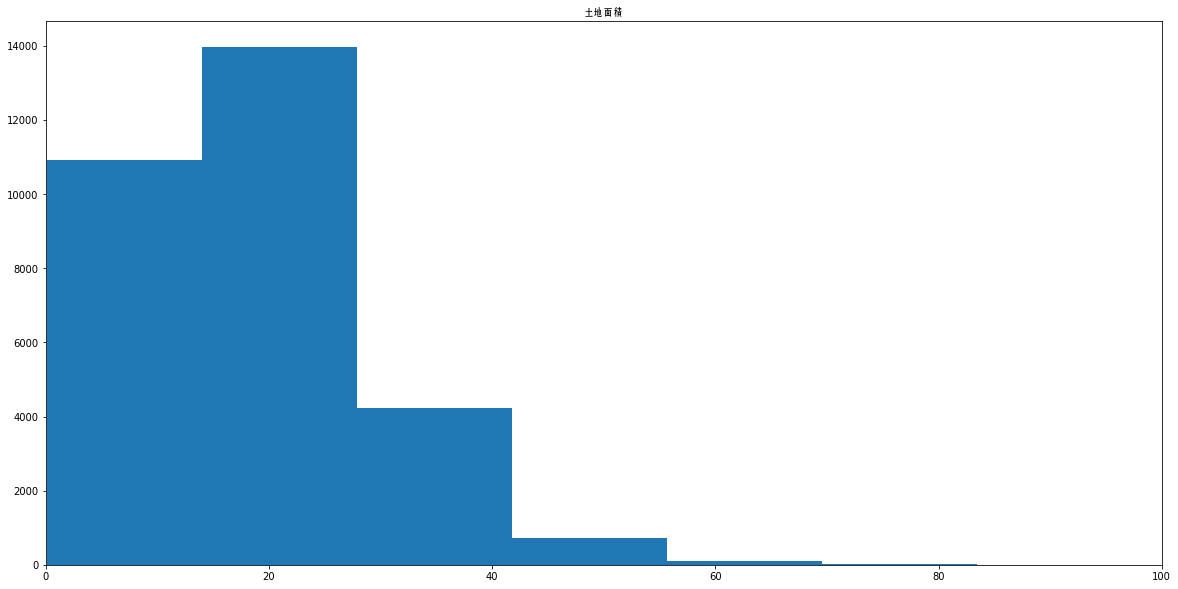

In [19]:
plt.figure(figsize=(20,10))
plt.title('土地面積', fontproperties=prop)
plt.hist(train['土地面積'], bins='rice')
plt.xlim(left=0, right=100)
plt.show()

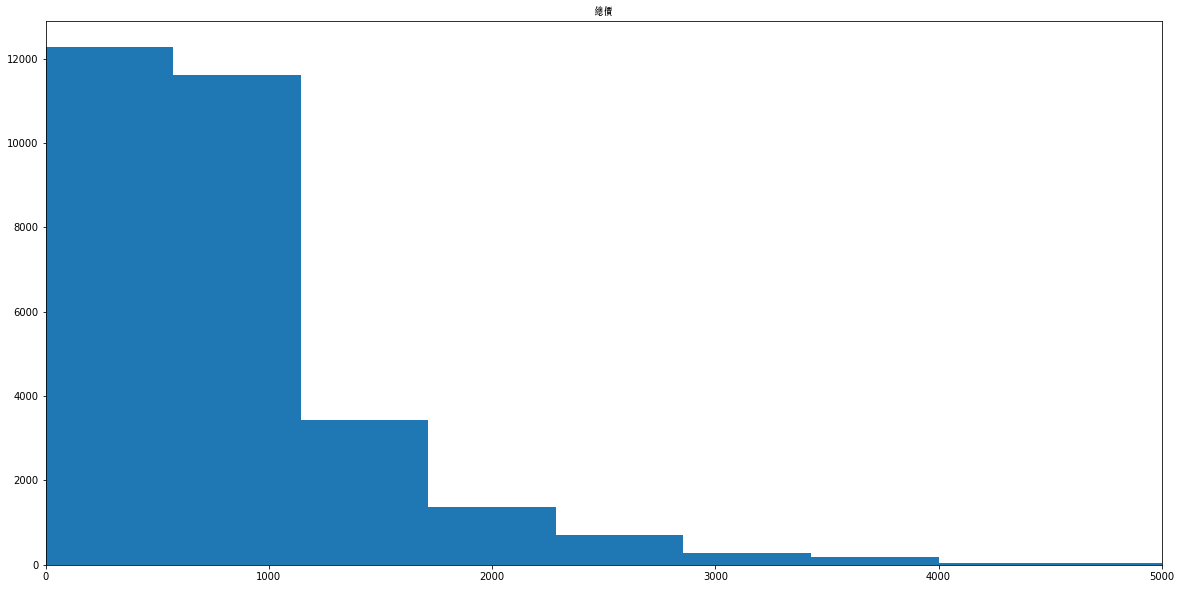

In [20]:
plt.figure(figsize=(20,10))
plt.title('總價', fontproperties=prop)
plt.hist(train['總價'], bins='rice')
plt.xlim(left=0, right=5000)
plt.show()

Text(0.5, 1.0, '樓層')

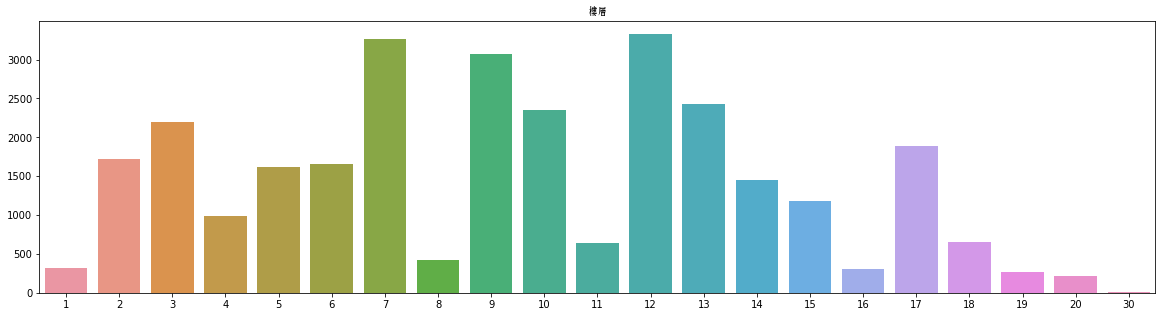

In [15]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=train['樓層'].unique(), y=train['樓層'].value_counts().values, data=train)
ax.set_title('樓層', fontproperties=prop)

Text(0.5, 1.0, '總樓層')

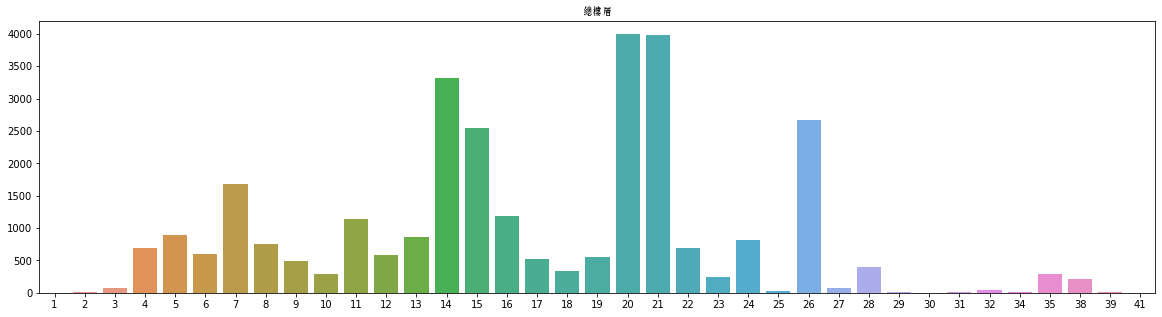

In [16]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=train['總樓層'].unique(), y=train['總樓層'].value_counts().values, data=train)
ax.set_title('總樓層', fontproperties=prop)

(-0.5, 10.0)

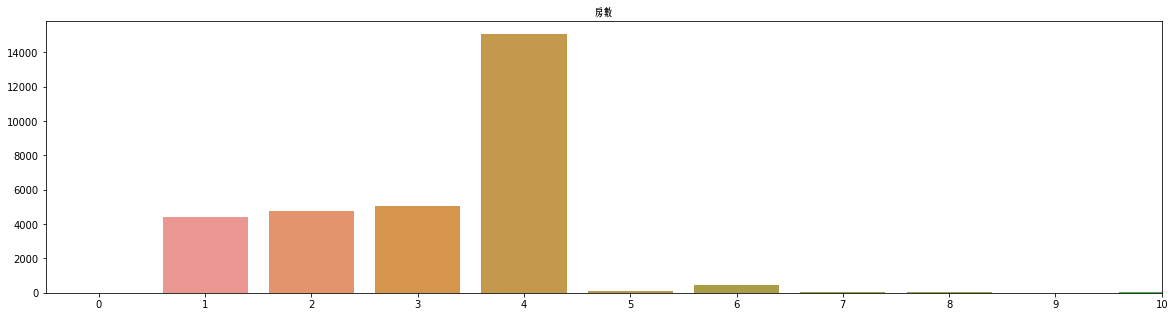

In [22]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=train['房數'].unique(), y=train['房數'].value_counts().values, data=train)
ax.set_title('房數', fontproperties=prop)
ax.set_xlim(right=10)

(-0.5, 10.0)

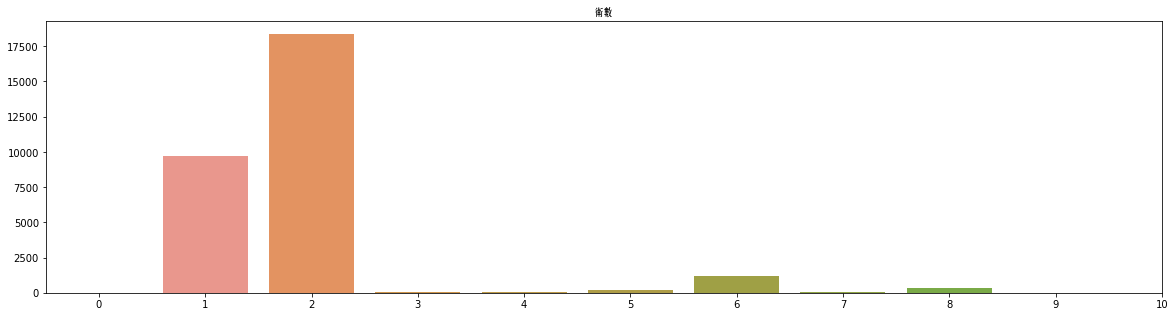

In [23]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=train[ '衛數'].unique(), y=train['衛數'].value_counts().values, data=train)
ax.set_title( '衛數', fontproperties=prop)
ax.set_xlim(right=10)

Text(0, 0.5, '總價')

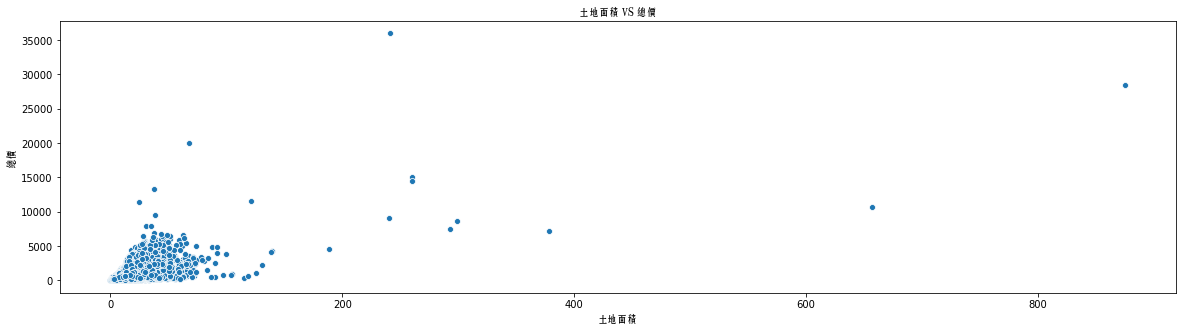

In [24]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(train['土地面積'], train['總價'])
ax.set_title( '土地面積 VS 總價', fontproperties=prop)
ax.set_xlabel( '土地面積', fontproperties=prop)
ax.set_ylabel( '總價', fontproperties=prop)
#ax.set_xlim(right=10)

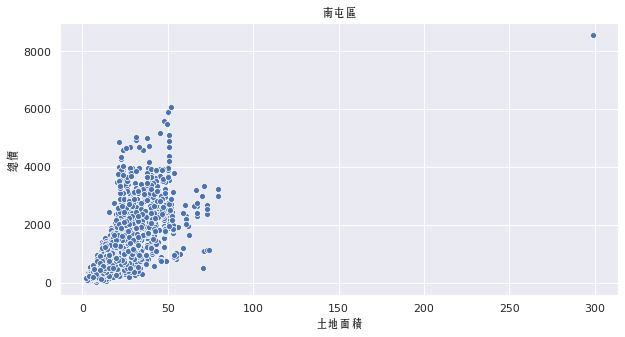

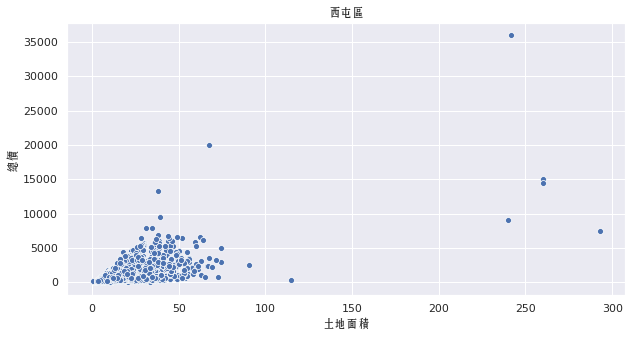

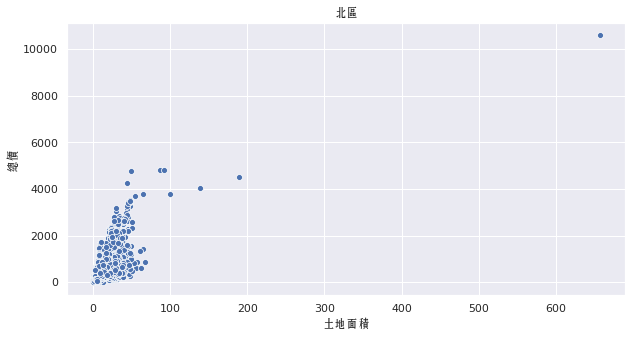

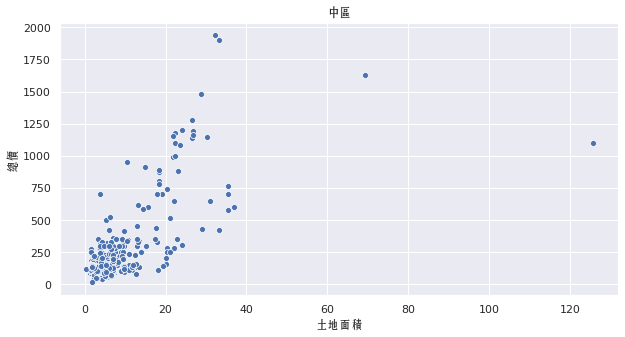

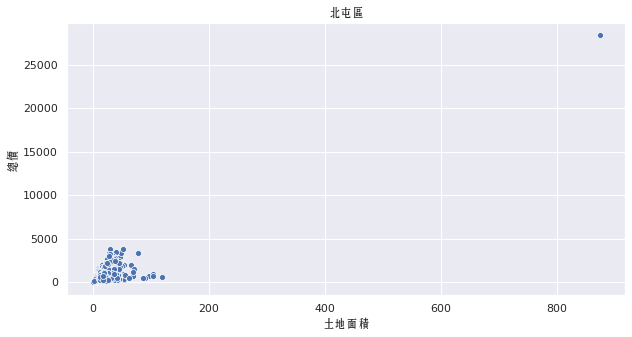

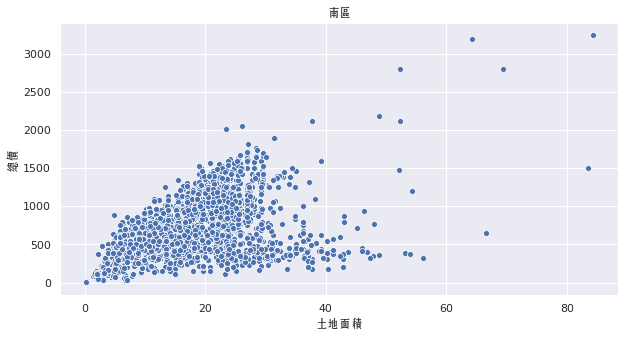

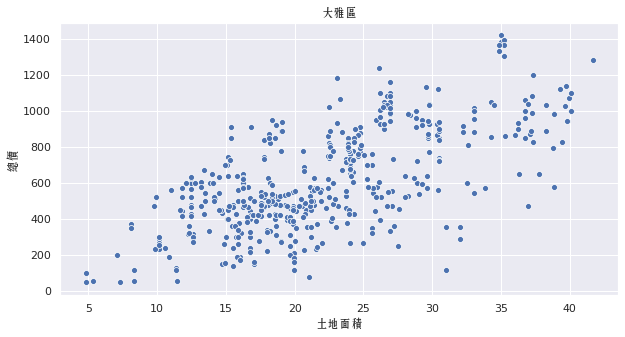

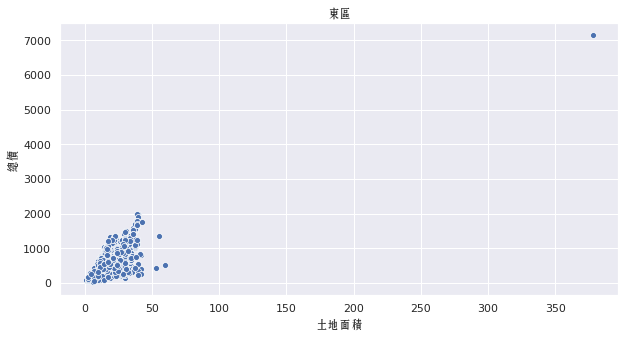

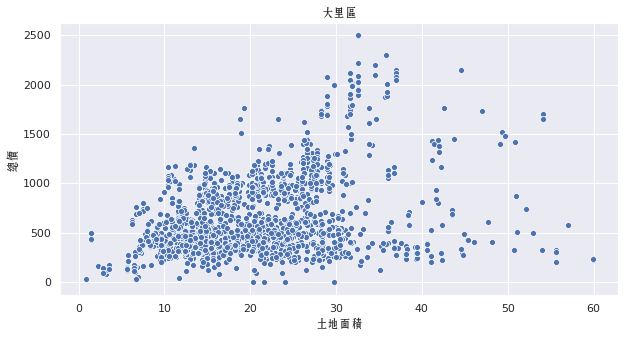

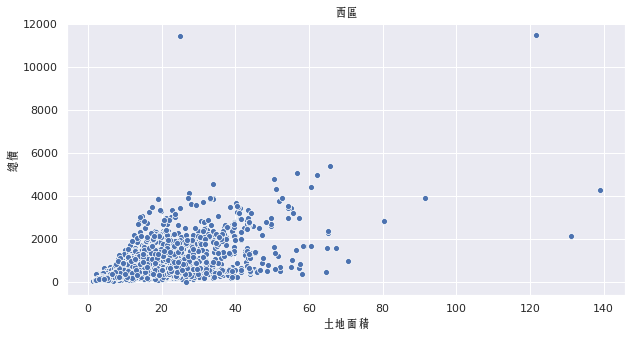

In [0]:
district = train['行政區'].unique()
for d in district:
  plt.figure(figsize=(10,5))
  ax = sns.scatterplot('土地面積', '總價', data=train.loc[train['行政區']==d, :])
  ax.set_title(d, fontproperties=prop)
  ax.set_xlabel('土地面積', fontproperties=prop)
  ax.set_ylabel('總價', fontproperties=prop)
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)


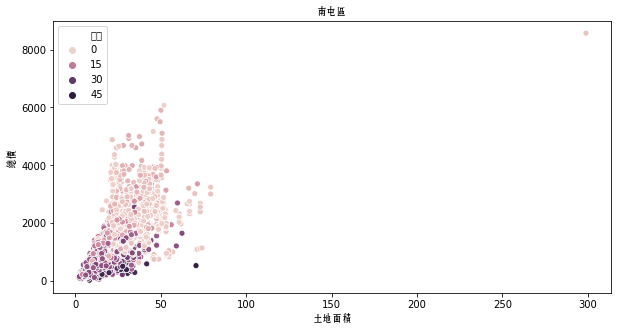

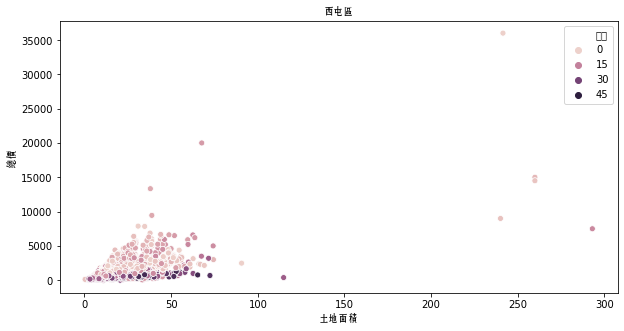

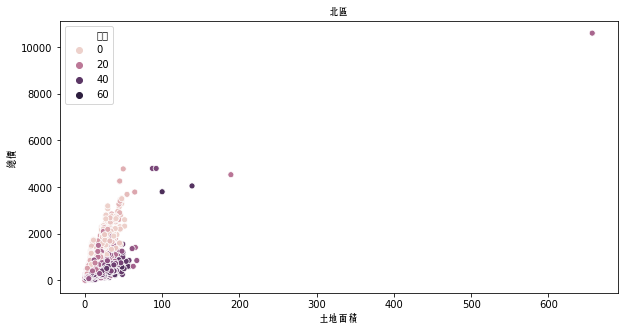

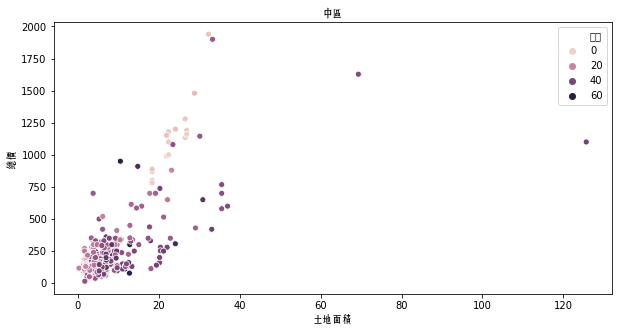

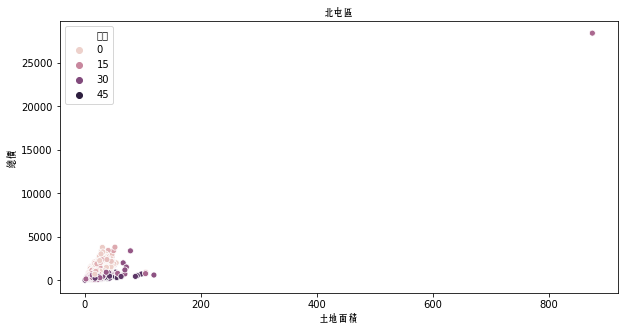

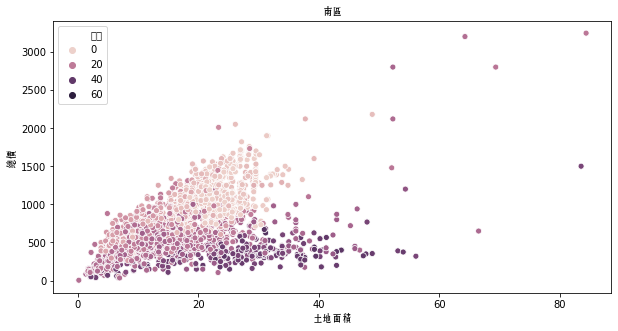

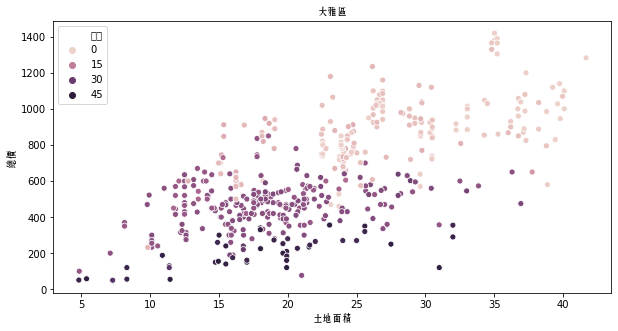

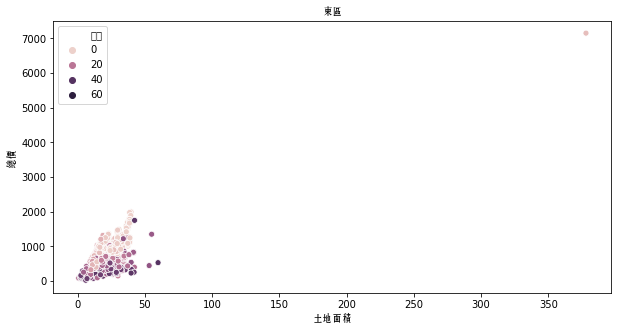

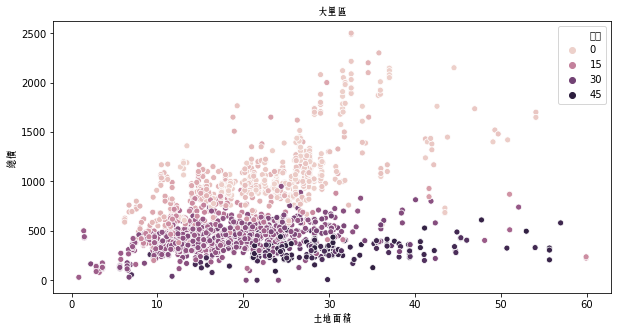

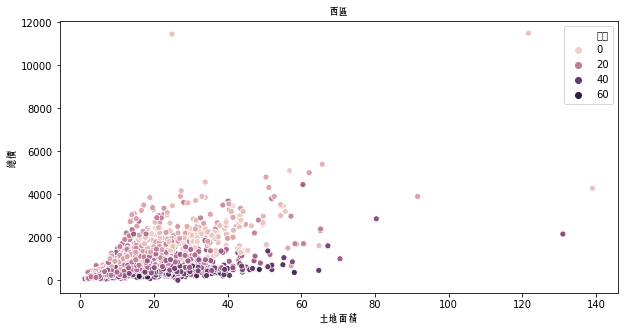

In [25]:
district = train['行政區'].unique()
for d in district:
  plt.figure(figsize=(10,5))
  ax = sns.scatterplot('土地面積', '總價', hue='屋齡', data=train.loc[train['行政區']==d, :])
  ax.set_title(d, fontproperties=prop)
  ax.set_xlabel('土地面積', fontproperties=prop)
  ax.set_ylabel('總價', fontproperties=prop)
  plt.show()

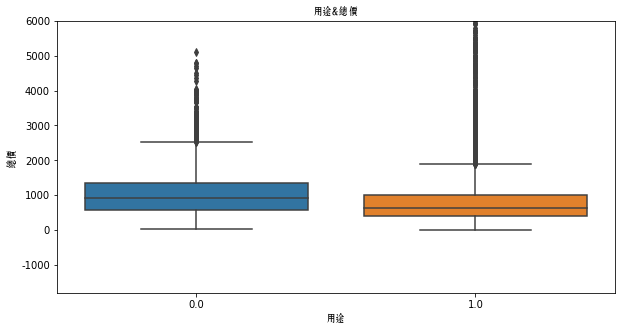

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train['用途'] = enc.fit_transform(np.array(train['用途']).reshape(-1,1)).toarray()

plt.figure(figsize=(10,5))
ax = sns.boxplot(x='用途', y='總價', data=train)
ax.set_ylim(top=6000)
ax.set_title('用途&總價', fontproperties=prop)
ax.set_xlabel('用途', fontproperties=prop)
ax.set_ylabel('總價', fontproperties=prop)
plt.show()

### Training Data Preprocessing

In [0]:
!pip install pyod 

In [29]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsRegressor

from scipy import stats
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.data import get_outliers_inliers

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


***Question: do we remove outliers before or after missing value imputations?***
<br>A1: remove before imputation https://discuss.analyticsvidhya.com/t/does-outlier-treatment-come-first-or-missing-value-imputation/11416
<br>A2: remove after imputation https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two
'''

In [0]:
''' Step 1: impute missing value or invalid value '''
train[train.isnull().values]
#train.drop(28986, axis=0, inplace=True)
train['屋齡'].fillna(value=train['屋齡'].mean(), inplace=True)

In [0]:
''' Step 2: Scaling numerical columns '''
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train.select_dtypes(include=numerics)

cols = ['土地面積', '建物總面積', '屋齡']
transformer = RobustScaler()
for col in cols:
  train[col] = transformer.fit_transform(np.array(train[col]).reshape(30000, -1)).flatten()

In [0]:
''' Step 3: Discretize numerical columns '''
for col in cols:
  X = np.array(train[col]).reshape(-1,1)
  est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans').fit(X)
  train[str(col)+'組別'] = est.transform(X)

In [33]:
''' Step 4: deal with observations with house price = 0 ''' 
train[train['總價'] == 0] #6 observations

''' method 1: treat them as outliers and remove '''
#train.drop(train[train['總價'] == 0].index, axis=0, inplace=True)

''' method 2: treat them as missing values and impute using KNN '''
district = pd.get_dummies(train['行政區'], drop_first=True)
df_knn = pd.concat([train, district], axis=1)
df_knn.drop('行政區', inplace=True, axis=1)

enc = OneHotEncoder()
df_knn['用途'] = enc.fit_transform(np.array(df_knn['用途']).reshape(-1,1)).toarray()

date = df_knn['交易日期'].str.split('/')
df_knn['year'] = [i[0] for i in date]
df_knn.drop('交易日期', inplace=True, axis=1)

data = df_knn.loc[df_knn['總價']!=0, :]
X = data.drop(['車位類別', '總價'], axis=1)
y = data['總價']

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)

X_test = df_knn.loc[df_knn['總價']==0,:]
y_pred = neigh.predict(X_test.drop(['車位類別', '總價'], axis=1))

index = train.loc[train['總價']==0,:].index
for i,j in zip(index, range(len(y_pred))):
  train.loc[i,'總價'] = y_pred[j] 
train.iloc[index,:]

,行政區,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,總價,土地面積組別,建物總面積組別,屋齡組別
4386,大里區,0.465150,0.249054,0.260975,5,7,1.0,3,2,2,1,無,2018/1/11,120.679558,24.095737,511.2,2.0,2.0,4.0
5798,大里區,0.195664,-0.048067,0.310154,6,7,1.0,3,2,2,1,無,2019/11/13,120.688712,24.107648,376.2,1.0,1.0,4.0
15470,大里區,0.286687,-0.530314,0.706337,4,5,1.0,3,2,2,0,無,2018/1/18,120.683116,24.114160,320.4,1.0,1.0,5.0
22036,西屯區,-0.475900,-0.400521,0.059277,9,15,1.0,2,2,1,1,坡道機械,2017/1/3,120.634910,24.176418,510.0,0.0,1.0,3.0
23785,西屯區,0.213582,0.017072,0.295466,6,15,1.0,3,2,2,1,無,2019/8/12,120.614063,24.182148,811.6,1.0,2.0,4.0
29228,西區,0.637162,-0.607319,0.895708,5,5,1.0,3,2,2,0,無,2017/9/20,120.661001,24.150425,316.2,2.0,1.0,6.0


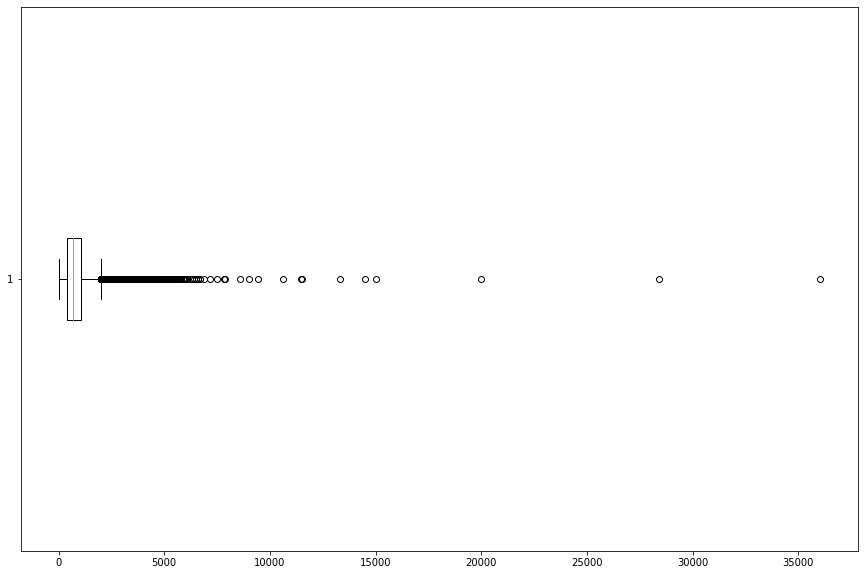

-542.875 1998.125


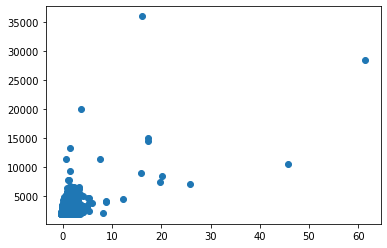

In [34]:
''' Step 5: deal with univariate outliers '''
plt.figure(figsize=(15,10))
plt.boxplot(train['總價'], vert=False)
plt.show()

q1, q3= np.percentile(train['總價'], [25,75])
iqr = q3 - q1 
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound, upper_bound)

''' method 1: remove outliers '''
# train = train[(train['總價']>=lower_bound)&(train['總價']<=upper_bound)]

''' method 2: train a separate model on outliers ''' 
df_outliers = train[train['總價']>=upper_bound]
plt.scatter(df_outliers['土地面積'], df_outliers['總價'])
plt.show()

In [0]:
plt.figure(figsize=(10, 10))
plt.scatter('建物總面積','總價', data=train)
plt.ylabel('總價', fontproperties=prop)
plt.xlabel('建物總面積', fontproperties=prop)

Multivariate outliers 
<br> https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
<br> https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
<br> https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [0]:
''' Step 6: deal with multivariate outliers '''
X1 = train['建物總面積'].values.reshape(-1,1)
X2 = train['總價'].values.reshape(-1,1)
X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.01

classifiers = {
        #'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = train
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['建物總面積'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['總價'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['建物總面積'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['總價'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ', n_outliers, 'INLIERS : ', n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    #a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    #plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='black',s=20, edgecolor='k')
    c = plt.scatter(OX1,OX2, c='red',s=20, edgecolor='k')
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    #plt.legend(
    #    [a.collections[0], b,c],
    #    ['learned decision function', 'inliers','outliers'],
    #    prop=matplotlib.font_manager.FontProperties(size=20),
    #    loc=2)
      
    #plt.xlim((0, 1))
    #plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

In [0]:
for col in cols:
  X1 = train[col].values.reshape(-1,1)
  X2 = train['總價'].values.reshape(-1,1)
  X = np.concatenate((X1,X2),axis=1)

  random_state = np.random.RandomState(42)
  outliers_fraction = 0.005

  classifiers = {
        #'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        #'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        #'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        #'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        #'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        #'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
  }


  for i, (clf_name, clf) in enumerate(classifiers.items()):
      clf.fit(X)

      # prediction of a datapoint category outlier or inlier
      y_pred = clf.predict(X)
      n_inliers = len(y_pred) - np.count_nonzero(y_pred)
      n_outliers = np.count_nonzero(y_pred == 1)
  
      # copy of dataframe
      dfx = train
      dfx['outlier'] = y_pred.tolist()
        
      print('OUTLIERS : ', n_outliers, 'INLIERS : ', n_inliers, clf_name)
  
  train = train[np.array(dfx['outlier']==0)]
  train.drop('outlier', inplace=True, axis=1)
  print(train.shape)

### Feature Engineering

In [39]:
district = pd.get_dummies(train['行政區'], drop_first=True)
train = pd.concat([train, district], axis=1)
train.drop('行政區', inplace=True, axis=1)
train.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,總價,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區
0,1.566028,1.869056,-0.945149,12,20,1.0,4,2,2,1,坡道平面,2019/3/22,120.622384,24.150631,2520.0,3.0,4.0,0.0,0,0,0,1,0,0,0,0,0
1,1.391865,0.904319,-0.866201,7,21,1.0,3,2,2,1,坡道平面,2019/11/18,120.627938,24.183700,1830.0,3.0,3.0,0.0,0,0,0,0,0,0,0,0,1
2,1.216269,0.989436,-0.418740,9,14,1.0,4,2,2,1,坡道平面,2018/12/11,120.640036,24.181468,1040.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,1
3,-0.662964,0.157641,-0.612308,13,26,1.0,2,1,2,1,坡道平面,2017/9/20,120.593303,24.182435,886.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,1
4,-0.199964,0.044435,0.197502,10,15,1.0,3,2,2,1,坡道平面,2019/5/26,120.605703,24.187636,675.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,1


In [40]:
enc = OneHotEncoder()
train['用途'] = enc.fit_transform(np.array(train['用途']).reshape(-1,1)).toarray()
train.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,總價,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區
0,1.566028,1.869056,-0.945149,12,20,0.0,4,2,2,1,坡道平面,2019/3/22,120.622384,24.150631,2520.0,3.0,4.0,0.0,0,0,0,1,0,0,0,0,0
1,1.391865,0.904319,-0.866201,7,21,0.0,3,2,2,1,坡道平面,2019/11/18,120.627938,24.183700,1830.0,3.0,3.0,0.0,0,0,0,0,0,0,0,0,1
2,1.216269,0.989436,-0.418740,9,14,0.0,4,2,2,1,坡道平面,2018/12/11,120.640036,24.181468,1040.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,1
3,-0.662964,0.157641,-0.612308,13,26,0.0,2,1,2,1,坡道平面,2017/9/20,120.593303,24.182435,886.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,1
4,-0.199964,0.044435,0.197502,10,15,0.0,3,2,2,1,坡道平面,2019/5/26,120.605703,24.187636,675.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,1


In [41]:
''' '車位類別' column one hot encoding ''' 
#carpark = ['無']
#0['坡道平面', 1], ['坡道機械', 1], ['升降機械', 1], ['升降平面', 1], ['其他', 1], ['一樓平面', 1], ['塔式車位', 1]
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(np.array(carpark).reshape(-1,1))
#train['carpark'] = enc.transform(np.array(train['車位類別']).reshape(-1,1)).toarray()
#train.drop('車位類別', inplace=True, axis=1)
#train.head()

''' '車位類別' column to dummies ''' 
carpark = pd.get_dummies(train['車位類別'], drop_first=True)
train = pd.concat([train, carpark], axis=1)
train.drop('車位類別', inplace=True, axis=1)
train.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,交易日期,經度,緯度,總價,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區,其他,升降平面,升降機械,坡道平面,坡道機械,塔式車位,無
0,1.566028,1.869056,-0.945149,12,20,0.0,4,2,2,1,2019/3/22,120.622384,24.150631,2520.0,3.0,4.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1.391865,0.904319,-0.866201,7,21,0.0,3,2,2,1,2019/11/18,120.627938,24.183700,1830.0,3.0,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1.216269,0.989436,-0.418740,9,14,0.0,4,2,2,1,2018/12/11,120.640036,24.181468,1040.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,-0.662964,0.157641,-0.612308,13,26,0.0,2,1,2,1,2017/9/20,120.593303,24.182435,886.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,-0.199964,0.044435,0.197502,10,15,0.0,3,2,2,1,2019/5/26,120.605703,24.187636,675.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [42]:
date = train['交易日期'].str.split('/')
train['year'] = [i[0] for i in date]
train['month'] = [i[1] for i in date]
#train['day'] = [i[2] for i in date]
train.drop('交易日期', inplace=True, axis=1)
train.head()

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,經度,緯度,總價,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區,其他,升降平面,升降機械,坡道平面,坡道機械,塔式車位,無,year,month
0,1.566028,1.869056,-0.945149,12,20,0.0,4,2,2,1,120.622384,24.150631,2520.0,3.0,4.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2019,3
1,1.391865,0.904319,-0.866201,7,21,0.0,3,2,2,1,120.627938,24.183700,1830.0,3.0,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2019,11
2,1.216269,0.989436,-0.418740,9,14,0.0,4,2,2,1,120.640036,24.181468,1040.0,2.0,3.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2018,12
3,-0.662964,0.157641,-0.612308,13,26,0.0,2,1,2,1,120.593303,24.182435,886.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2017,9
4,-0.199964,0.044435,0.197502,10,15,0.0,3,2,2,1,120.605703,24.187636,675.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2019,5


### Feature selection 
1. Select according to p-value 
2. Backward Elimination (BE)
3. Recursive Feature Elimination (RFE)
4. L1-based feature selection 
  - Lasso selection (LSO)
  - Lasso CV selection (LSOCV)
5. Tree-based Feature Elimination 
  - Random Forest Regressor (RF)



In [0]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import statistics as stat
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [0]:
sns.set(font=prop.get_name())

Select features based on p-values


In [51]:
X = train.drop('總價', axis=1)
y = train['總價']
X = sm.add_constant(X)

ols = sm.OLS(y, X.astype(float))
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     總價   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     6529.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        09:24:15   Log-Likelihood:            -2.0208e+05
No. Observations:               29792   AIC:                         4.042e+05
Df Residuals:                   29758   BIC:                         4.045e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.632e+04    1.3e+04      5.092      0.000    4.08e+04    9.18e+04
土地面積          12.1409      4.825      2.516      0.012       2.685      21.597
建物總面積        634.8073      4.965    127.865      0.000     625.076     644.538
屋齡          -405.2544     12.245    -33.096      0.000    -429.255    -381.254
樓層             3.0624      0.347      8.826      0.000       2.382       3.742
總樓層            8.4210      0.369     22.839      0.000       7.698       9.144
用途             8.9137      4.344      2.052      0.040       0.400      17.427
房數           -41.4190      2.316    -17.882      0.000     -45.959     -36.879
廳數           -31.9369      2.441    -13.082      0.000     -36.722     -27.152
衛數            15.8524      2.492      6.360      0.000      10.967      20.738
電梯          -179.9313      6.071    -29.636      0.000    -191.831    -168.031
經度          -938.3582     90.988    -10.313      0.000   -1116.699    -760.017
緯度          -706.1364    150.261     -4.699      0.000   -1000.654    -411.618
土地面積組別        -0.0119      3.800     -0.003      0.998      -7.461       7.437
建物總面積組別      -48.4310      3.789    -12.782      0.000     -55.858     -41.004
屋齡組別          54.7391      3.712     14.746      0.000      47.463      62.015
北區            19.6664     10.506      1.872      0.061      -0.926      40.259
北屯區          -66.5295     11.777     -5.649      0.000     -89.613     -43.446
南區          -117.0441     11.284    -10.372      0.000    -139.161     -94.927
南屯區           60.0749     11.202      5.363      0.000      38.118      82.032
大里區         -142.9095     12.163    -11.749      0.000    -166.750    -119.069
大雅區          -86.7760     18.039     -4.811      0.000    -122.133     -51.419
東區          -135.1641     11.800    -11.455      0.000    -158.292    -112.036
西區            60.9705     10.569      5.769      0.000      40.256      81.685
西屯區           41.7375     11.285      3.699      0.000      19.619      63.856
其他             7.7951     43.351      0.180      0.857     -77.175      92.765
升降平面         -72.6163     37.344     -1.945      0.052    -145.813       0.580
升降機械          -8.6699     34.116     -0.254      0.799     -75.539      58.200
坡道平面          15.7903     33.115      0.477      0.633     -49.117      80.698
坡道機械          -1.2073     33.227     -0.036      0.971     -66.333      63.918
塔式車位          63.9010    216.328      0.295      0.768    -360.111     487.913
無             32.5667     33.193      0.981      0.327     -32.492      97.626
year          32.0946      1.356     23.661      0.000      29.436      34.753
month          3.0129      0.370      8.147      0.000       2.288       3.738
==============================================================================
Omnibus:                     6580.718   Durbin-Watson:                   2.011
Pr

Backward elimination 


In [52]:
''' Backward Elimination https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e '''
X = train.drop('總價', axis=1)
y = train['總價']

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
features_BE = cols
print(features_BE)

['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '房數', '廳數', '衛數', '電梯', '經度', '緯度', '建物總面積組別', '屋齡組別', '北屯區', '南區', '南屯區', '大里區', '大雅區', '東區', '西區', '西屯區', '升降平面', '坡道平面', '無', 'year', 'month']


In [53]:
X = train.loc[:, features_BE]
y = train['總價']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

221.01744097816498

Recursive Feature Elimination (RFE)

findfont: Font family ['CSong3HK'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CSong3HK'] not found. Falling back to DejaVu Sans.


Optimal number of features : 32


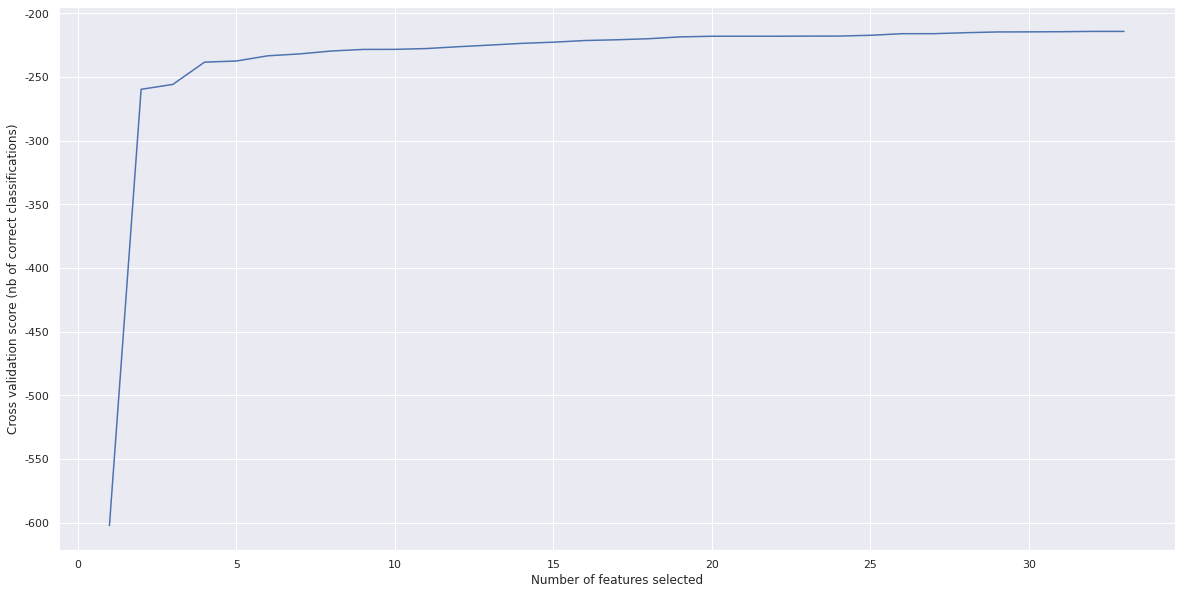

In [45]:
reg = LinearRegression()
X = train.drop('總價', axis=1)
y = train['總價']

rfecv = RFECV(estimator=reg, step=1, scoring='neg_root_mean_squared_error')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(20,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [46]:
features_RFE = X.columns[rfecv.support_]
features_RFE

Index(['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '用途', '房數', '廳數', '衛數', '電梯', '經度',
       '緯度', '建物總面積組別', '屋齡組別', '北區', '北屯區', '南區', '南屯區', '大里區', '大雅區', '東區',
       '西區', '西屯區', '其他', '升降平面', '升降機械', '坡道平面', '坡道機械', '塔式車位', '無', 'year',
       'month'],
      dtype='object')

In [47]:
X = train.loc[:, features_RFE]
y = train['總價']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

208.38106440254157

L1-based feature selection

In [54]:
X = train.drop('總價', axis=1)
y = train['總價']
lso = Lasso().fit(X, y)
model = SelectFromModel(lso, prefit=True)
X_new = model.transform(X)
X_new.shape

(29792, 25)

In [55]:
features_LSO = X.columns[model.get_support()]
features_LSO

Index(['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '用途', '房數', '廳數', '衛數', '電梯',
       '建物總面積組別', '屋齡組別', '北區', '北屯區', '南區', '南屯區', '大里區', '東區', '西區', '西屯區',
       '坡道平面', '坡道機械', '無', 'year', 'month'],
      dtype='object')

In [56]:
y = train['總價']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

210.49144309644916

In [57]:
X = train.drop('總價', axis=1)
y = train['總價']
lso = LassoCV().fit(X, y)
model = SelectFromModel(lso, prefit=True)
X_new = model.transform(X)
X_new.shape

(29792, 23)

In [58]:
features_LSOCV = X.columns[model.get_support()]
features_LSOCV

Index(['土地面積', '建物總面積', '屋齡', '樓層', '總樓層', '房數', '廳數', '衛數', '電梯', '建物總面積組別',
       '屋齡組別', '北區', '北屯區', '南區', '南屯區', '大里區', '東區', '西區', '西屯區', '坡道機械', '無',
       'year', 'month'],
      dtype='object')

In [59]:
y = train['總價']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

211.8131426206574

Tree-based feature selection

In [60]:
X = train.drop('總價', axis=1)
y = train['總價']
rf = RandomForestRegressor().fit(X, y)
model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X)
X_new.shape

(29792, 3)

In [61]:
features_RF = X.columns[model.get_support()]
features_RF

Index(['建物總面積', '屋齡', '經度'], dtype='object')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

236.9864824501477

### Test Data Preprocessing

In [67]:
test = pd.read_csv('test.csv', index_col=0)
test.head(3)

,行政區,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度
id,,,,,,,,,,,,,,,
0,北區,2.52,34.16,23.031274,10,12,住,1,1,1,1,無,2017/5/23,120.691126,24.159229
1,南屯區,33.64,234.89,1.133494,19,20,住,3,2,2,1,坡道平面,2019/8/13,120.622384,24.150631
2,西屯區,2.64,26.94,24.537123,6,15,住,1,0,1,1,無,2019/8/30,120.646916,24.170230


In [68]:
''' Step 1: detect missing value or invalid value '''
test[test.isnull().values]

,行政區,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度
id,,,,,,,,,,,,,,,


In [0]:
''' Step 2: Scaling numerical columns '''
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test.select_dtypes(include=numerics)

cols = ['土地面積', '建物總面積', '屋齡']
transformer = RobustScaler()
for col in cols:
  test[col] = transformer.fit_transform(np.array(test[col]).reshape(5000, -1)).flatten()

In [0]:
''' Discretize numerical columns '''
for col in cols:
  X = np.array(test[col]).reshape(-1,1)
  est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans').fit(X)
  test[str(col)+'組別'] = est.transform(X)

In [71]:
district = pd.get_dummies(test['行政區'], drop_first=True)
test = pd.concat([test, district], axis=1)
test.drop('行政區', inplace=True, axis=1)
test.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.073006,-1.162641,0.110869,10,12,住,1,1,1,1,無,2017/5/23,120.691126,24.159229,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0
1,1.143519,1.346249,-0.961357,19,20,住,3,2,2,1,坡道平面,2019/8/13,120.622384,24.150631,4.0,3.0,0.0,0,0,0,1,0,0,0,0,0
2,-1.064459,-1.252883,0.184603,6,15,住,1,0,1,1,無,2019/8/30,120.646916,24.170230,0.0,0.0,3.0,0,0,0,0,0,0,0,0,1
3,-0.318020,-0.694435,0.027885,1,9,住,3,2,2,1,無,2017/10/19,120.697030,24.174575,1.0,0.0,3.0,0,1,0,0,0,0,0,0,0
4,1.603632,2.608880,-0.807052,9,14,住,3,2,3,1,坡道平面,2017/12/26,120.627309,24.149909,4.0,5.0,0.0,0,0,0,1,0,0,0,0,0


In [72]:
enc = OneHotEncoder()
test['用途'] = enc.fit_transform(np.array(test['用途']).reshape(-1,1)).toarray()
test.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,車位類別,交易日期,經度,緯度,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.073006,-1.162641,0.110869,10,12,1.0,1,1,1,1,無,2017/5/23,120.691126,24.159229,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0
1,1.143519,1.346249,-0.961357,19,20,1.0,3,2,2,1,坡道平面,2019/8/13,120.622384,24.150631,4.0,3.0,0.0,0,0,0,1,0,0,0,0,0
2,-1.064459,-1.252883,0.184603,6,15,1.0,1,0,1,1,無,2019/8/30,120.646916,24.170230,0.0,0.0,3.0,0,0,0,0,0,0,0,0,1
3,-0.318020,-0.694435,0.027885,1,9,1.0,3,2,2,1,無,2017/10/19,120.697030,24.174575,1.0,0.0,3.0,0,1,0,0,0,0,0,0,0
4,1.603632,2.608880,-0.807052,9,14,1.0,3,2,3,1,坡道平面,2017/12/26,120.627309,24.149909,4.0,5.0,0.0,0,0,0,1,0,0,0,0,0


In [73]:
''' '車位類別' column one hot encoding ''' 
#carpark = ['無']
#0['坡道平面', 1], ['坡道機械', 1], ['升降機械', 1], ['升降平面', 1], ['其他', 1], ['一樓平面', 1], ['塔式車位', 1]
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(np.array(carpark).reshape(-1,1))
#test['carpark'] = enc.transform(np.array(test['車位類別']).reshape(-1,1)).toarray()
#test.drop('車位類別', inplace=True, axis=1)
#test.head()

''' '車位類別' column to dummies ''' 
carpark = pd.get_dummies(test['車位類別'], drop_first=True)
test = pd.concat([test, carpark], axis=1)
test.drop('車位類別', inplace=True, axis=1)
test.head(5)

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,交易日期,經度,緯度,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區,其他,升降平面,升降機械,坡道平面,坡道機械,塔式車位,無
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.073006,-1.162641,0.110869,10,12,1.0,1,1,1,1,2017/5/23,120.691126,24.159229,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.143519,1.346249,-0.961357,19,20,1.0,3,2,2,1,2019/8/13,120.622384,24.150631,4.0,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-1.064459,-1.252883,0.184603,6,15,1.0,1,0,1,1,2019/8/30,120.646916,24.170230,0.0,0.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,-0.318020,-0.694435,0.027885,1,9,1.0,3,2,2,1,2017/10/19,120.697030,24.174575,1.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.603632,2.608880,-0.807052,9,14,1.0,3,2,3,1,2017/12/26,120.627309,24.149909,4.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
date = test['交易日期'].str.split('/')
test['year'] = [i[0] for i in date]
test['month'] = [i[1] for i in date]
#test['day'] = [i[2] for i in date]
test.drop('交易日期', inplace=True, axis=1)
test.head()

,土地面積,建物總面積,屋齡,樓層,總樓層,用途,房數,廳數,衛數,電梯,經度,緯度,土地面積組別,建物總面積組別,屋齡組別,北區,北屯區,南區,南屯區,大里區,大雅區,東區,西區,西屯區,其他,升降平面,升降機械,坡道平面,坡道機械,塔式車位,無,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.073006,-1.162641,0.110869,10,12,1.0,1,1,1,1,120.691126,24.159229,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017,5
1,1.143519,1.346249,-0.961357,19,20,1.0,3,2,2,1,120.622384,24.150631,4.0,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2019,8
2,-1.064459,-1.252883,0.184603,6,15,1.0,1,0,1,1,120.646916,24.170230,0.0,0.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2019,8
3,-0.318020,-0.694435,0.027885,1,9,1.0,3,2,2,1,120.697030,24.174575,1.0,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017,10
4,1.603632,2.608880,-0.807052,9,14,1.0,3,2,3,1,120.627309,24.149909,4.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2017,12


### Model Selection 


In [0]:
import math

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [0]:
X = train.drop('總價', axis=1)
y = train['總價']

In [0]:
features_set = {'All': X.columns,
                'BE': features_BE,
                'RFE': features_RFE,
                'LSO': features_LSO,
                'LSOCV': features_LSOCV,
                'RF': features_RF}

regressor = []
model_0 = linear_model.LinearRegression()
regressor.append(model_0)
model_1 = linear_model.Ridge()
regressor.append(model_1)
model_2 = linear_model.Lasso()
regressor.append(model_2)
model_3 = linear_model.LassoCV()
regressor.append(model_3)
model_4 = linear_model.LassoLars()
regressor.append(model_4)
model_5 = linear_model.LassoLarsCV()
regressor.append(model_5)
model_6 = linear_model.LassoLarsIC(criterion='bic')
regressor.append(model_6)
model_7 = linear_model.ElasticNet()
regressor.append(model_7)
model_8 = linear_model.BayesianRidge()
regressor.append(model_8)
#model_9 = linear_model.ARDRegression()
#regressor.append(model_9)
#model_10 = linear_model.SGDRegressor()
#regressor.append(model_10)
model_9 = linear_model.RANSACRegressor()
regressor.append(model_9)
model_10 = linear_model.TheilSenRegressor()
regressor.append(model_10)
model_11 = linear_model.HuberRegressor()
regressor.append(model_11)
#model_14 = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                     ('linear', linear_model.LinearRegression())])
#regressor.append(model_14)

for key in features_set.keys():
  for index in range(len(regressor)):
    result = cross_val_score(regressor[index], X.loc[:, features_set[key]], y, scoring='neg_root_mean_squared_error', n_jobs=-1)
    acc = result.mean()
    print('Model ' + str(index) + ' with ' + str(key) + ': ' + str(acc*(-1)))

### Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV

In [64]:
''' Model 0 with RFE '''
X = train.drop('總價', axis=1)
X = X.loc[:, features_RFE]
y = train['總價']

parameter ={'fit_intercept': (True, False),
            'normalize': (True, False)
}

reg = LinearRegression()
mod = GridSearchCV(reg, parameter, scoring='neg_root_mean_squared_error')
mod.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [65]:
mod.best_params_

{'fit_intercept': True, 'normalize': False}

### Model Prediction 

In [0]:
from sklearn.linear_model import LinearRegression

X_train = train.drop('總價', axis=1)
X_train = X_train.loc[:, features_RFE]
y_train = train['總價']
reg = LinearRegression().fit(X_train, y_train)

test = test.loc[:, features_RFE]
y_pred = reg.predict(test)

In [0]:
''' use knn to deal with negative predictions ''' 
X = test.loc[(y_pred>0), :]
y = y_pred[y_pred>0]

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)

X_test = test.loc[(y_pred<=0), :]
y_test = neigh.predict(X_test)

In [77]:
sub = pd.read_csv('sampleSubmission.csv')
sub['總價'] = y_pred

index = sub.loc[sub['總價']<=0,:].index
for i,j in zip(index, range(len(y_test))):
  sub.loc[i,'總價'] = y_test[j] 
sub.iloc[index,:]

,id,總價
56,56,105.470273
68,68,196.642942
96,96,73.594804
128,128,167.240556
170,170,189.394796
...,...,...
4670,4670,187.895767
4680,4680,199.923371
4726,4726,94.104099
4749,4749,138.481048


In [0]:
sub['總價'] = sub['總價'].astype(int)
sub.head()

,id,總價
0,0,71
1,1,1979
2,2,158
3,3,171
4,4,2505


In [0]:
sub.to_csv('prediction.csv', index=False)